<a href="https://colab.research.google.com/github/As2909/Cognifyz_Technologies/blob/main/Task_4_location_Based_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [47]:
df = pd.read_csv('/content/Dataset.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [48]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [49]:
df.shape

(9551, 21)

In [50]:
df.isnull().sum().sort_values(ascending=False)

Cuisines                9
Restaurant ID           0
Currency                0
Rating text             0
Rating color            0
Aggregate rating        0
Price range             0
Switch to order menu    0
Is delivering now       0
Has Online delivery     0
Has Table booking       0
Average Cost for two    0
Restaurant Name         0
Latitude                0
Longitude               0
Locality Verbose        0
Locality                0
Address                 0
City                    0
Country Code            0
Votes                   0
dtype: int64

In [51]:
df.dropna(inplace=True)

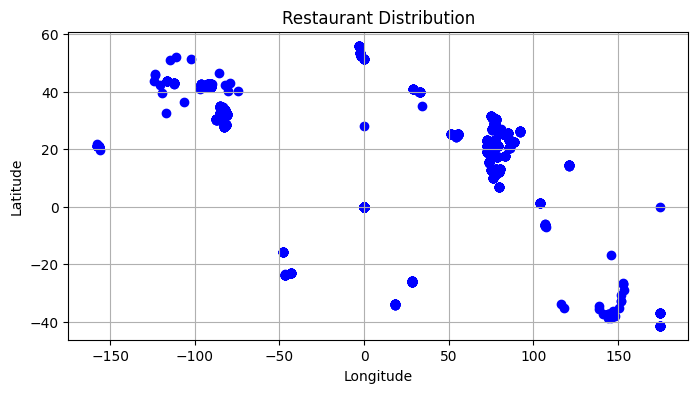

In [52]:
# Create a scatter plot of latitude and longitude
plt.figure(figsize=(8, 4))
plt.scatter(df['Longitude'], df['Latitude'], marker='o', color='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Restaurant Distribution')
plt.grid(True)
plt.show()

In [56]:

fig = px.scatter_geo(df, lat="Latitude", lon="Longitude", color="City",
                     hover_name="Restaurant Name", size="Votes",
                     scope="world", template="seaborn", title="Restaurant Distribution")
fig.show()


In [ ]:
# Group by City
city_group = df.groupby('City').size().reset_index(name='Restaurant Count')
city_group

,City,Restaurant Count
0,Abu Dhabi,20
1,Agra,20
2,Ahmedabad,21
3,Albany,17
4,Allahabad,20
...,...,...
135,Weirton,1
136,Wellington City,20
137,Winchester Bay,1
138,Yorkton,1


In [ ]:
# Calculate statistics by City
city_stats = df.groupby('City').agg({
    'Aggregate rating': 'mean',
    'Price range': 'mean',
    'Votes': 'sum'
}).reset_index()

city_stats

,City,Aggregate rating,Price range,Votes
0,Abu Dhabi,4.300000,3.300000,6045
1,Agra,3.965000,2.650000,2062
2,Ahmedabad,4.161905,2.571429,12266
3,Albany,3.552941,1.823529,1446
4,Allahabad,3.395000,2.650000,1392
...,...,...,...,...
135,Weirton,3.900000,2.000000,156
136,Wellington City,4.250000,3.250000,2926
137,Winchester Bay,3.200000,2.000000,16
138,Yorkton,3.300000,2.000000,26


In [ ]:
# Merge restaurant count with city stats
city_stats = city_stats.merge(city_group, on='City')
city_stats

,City,Aggregate rating,Price range,Votes,Restaurant Count
0,Abu Dhabi,4.300000,3.300000,6045,20
1,Agra,3.965000,2.650000,2062,20
2,Ahmedabad,4.161905,2.571429,12266,21
3,Albany,3.552941,1.823529,1446,17
4,Allahabad,3.395000,2.650000,1392,20
...,...,...,...,...,...
135,Weirton,3.900000,2.000000,156,1
136,Wellington City,4.250000,3.250000,2926,20
137,Winchester Bay,3.200000,2.000000,16,1
138,Yorkton,3.300000,2.000000,26,1


In [ ]:
top_10_cities = city_stats['City'].value_counts()[:10].index
top_city_stats = city_stats[city_stats['City'].isin(top_10_cities)]


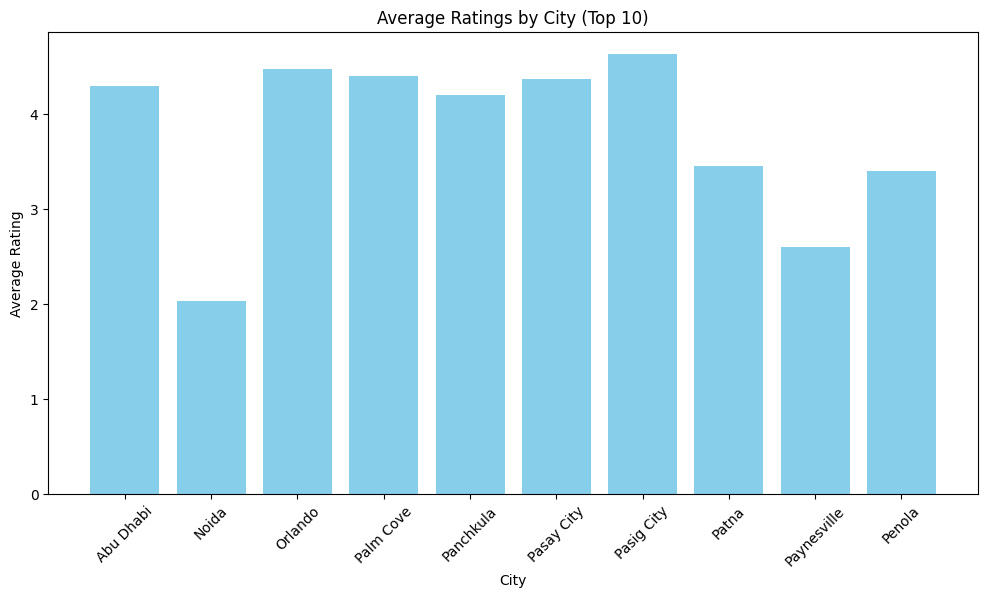

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(top_city_stats['City'], top_city_stats['Aggregate rating'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Average Ratings by City (Top 10)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Assuming city_stats is a DataFrame containing city-wise data
top_10_cities = city_stats['City'].value_counts()[:10].index
top_city_stats = city_stats[city_stats['City'].isin(top_10_cities)]

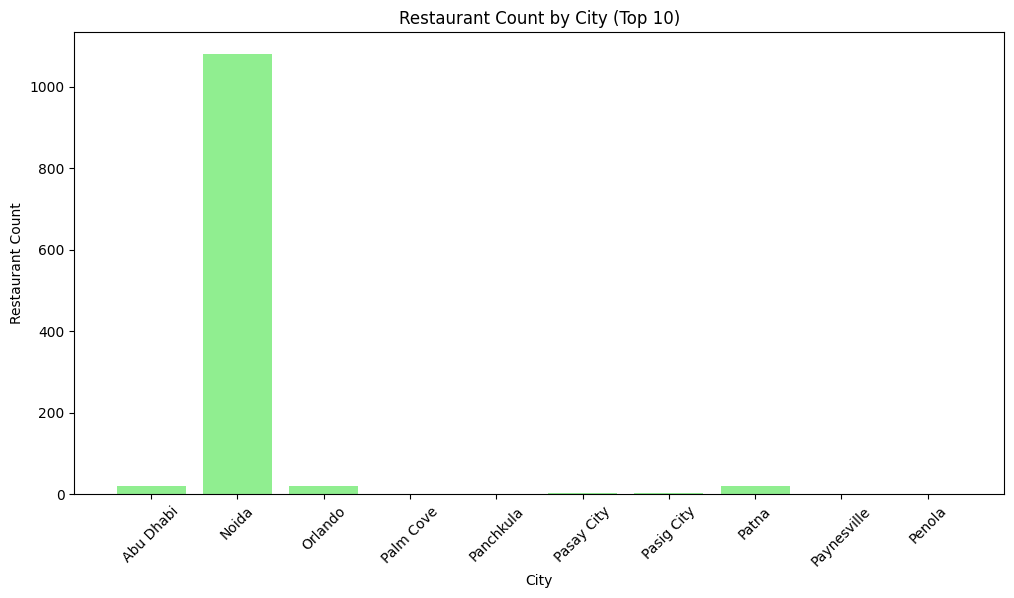

In [ ]:
# Plot Top 10 restaurant counts by city
plt.figure(figsize=(12, 6))
plt.bar(top_city_stats['City'], top_city_stats['Restaurant Count'], color='lightgreen')
plt.xlabel('City')
plt.ylabel('Restaurant Count')
plt.title('Restaurant Count by City (Top 10)')
plt.xticks(rotation=45)
plt.show()